In [20]:
%matplotlib inline

import os
import glob
import random
import colorcet as cc
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from scipy import ndimage
from skimage import color

matplotlib.rcParams['figure.figsize'] = (20, 20)

In [19]:
one_line = np.random.uniform(0, 1, (1, 1024))
stripes = np.tile(one_line, (1024, 1))
# stripes = color.label2rgb((stripes * 255).astype(np.uint8), colors=cc.b_linear_bmw_5_95_c86)
cm = plt.get_cmap('BuGn')
stripes = cm(stripes)
im = Image.fromarray(np.uint8((stripes)*255))

In [21]:
color_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
             'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
             'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
             'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
             'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
             'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
             'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot',
             'afmhot_r', 'autumn', 'autumn_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r',
             'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',
             'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
             'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',
             'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r',
             'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r',
             'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r',
             'summer', 'summer_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

In [23]:
one_line = np.random.uniform(0, 1, (1, 1024))
stripes = np.tile(one_line, (1024, 1))
cm = plt.get_cmap(random.choice(color_list))
stripes_colored = Image.fromarray(np.uint8(cm(stripes) * 255))

stripes_colored.save('test_stripes.png', mode='RGB')

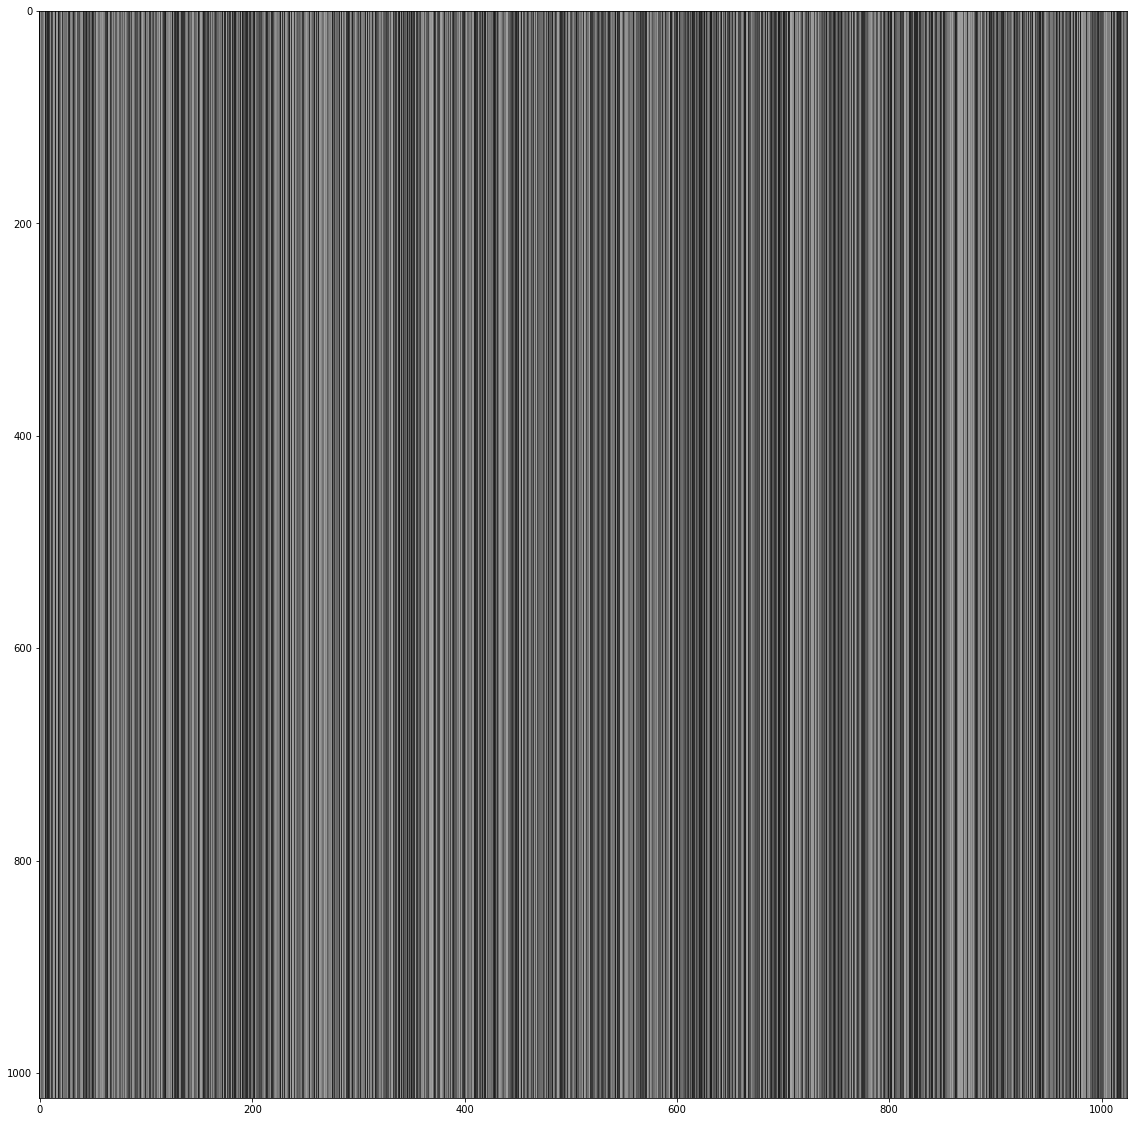

In [29]:
plt.imshow(stripes_colored.convert(mode='F'))
plt.show()

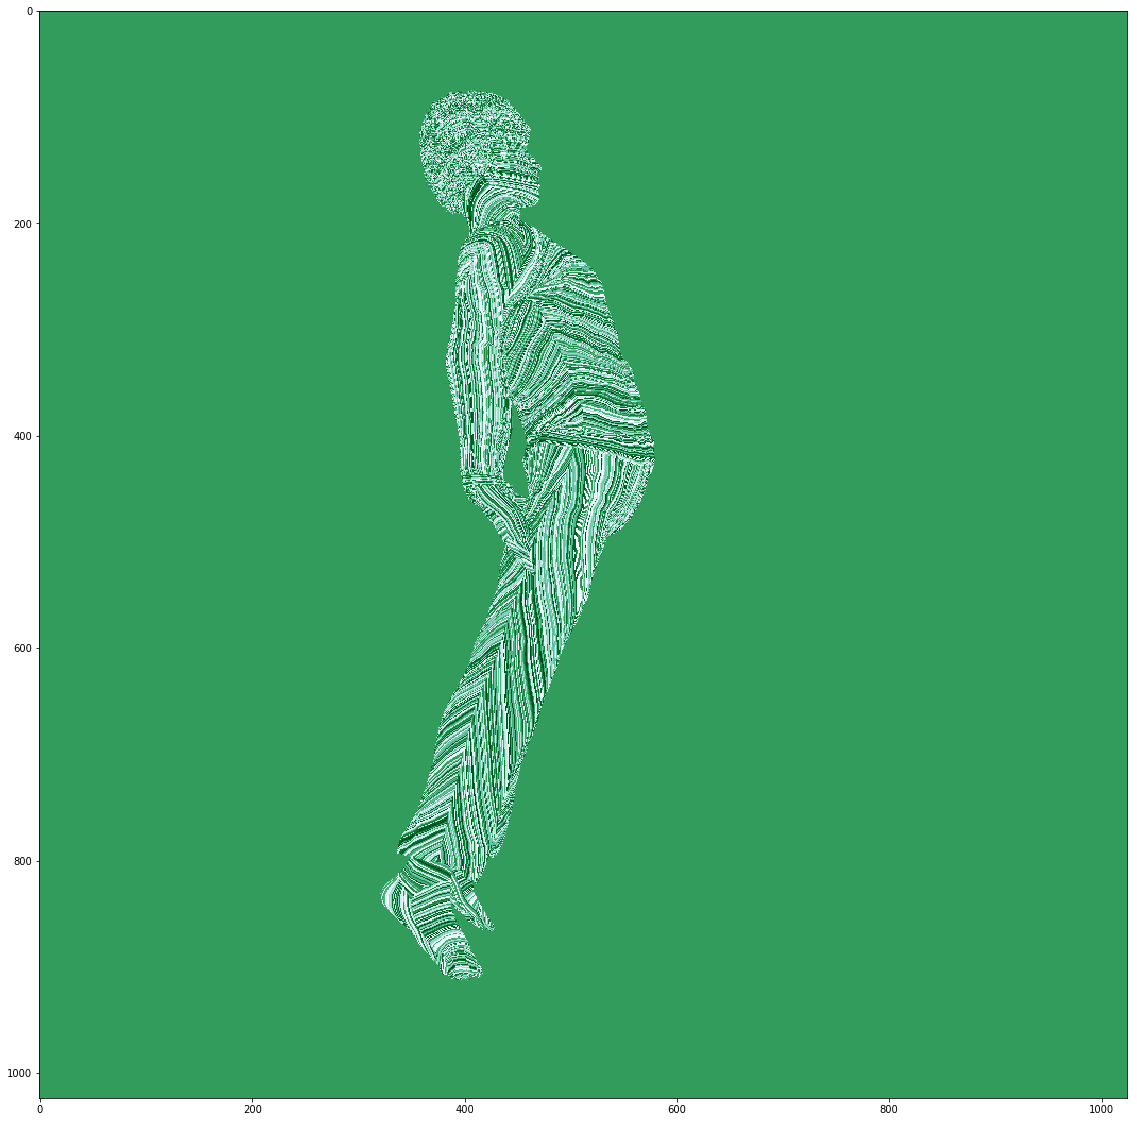

In [16]:
import OpenEXR
import Imath

# texture = np.stack([stripes * 255, stripes * 255, stripes * 255], axis=2)
texture = stripes

exr_uv = OpenEXR.InputFile(os.path.join('data', 'uv_tests', 'uv0001_noaa.exr'))
pixel_type = Imath.PixelType(Imath.PixelType.FLOAT)
dw = exr_uv.header()['dataWindow']
size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y +1)
uv_r = exr_uv.channel('R', pixel_type)
uv_r = Image.frombytes('F', size, uv_r)

uv_g = exr_uv.channel('G', pixel_type)
uv_g = Image.frombytes('F', size, uv_g)

uv_factor = 1025
u = np.asarray(uv_r) * uv_factor
v = np.asarray(uv_g) * uv_factor

uv = np.stack([u, v], axis=2)
uv = uv.transpose(2, 0, 1)

mapped_r = ndimage.map_coordinates(texture[:, :, 0], uv, prefilter=False, order=0)
mapped_g = ndimage.map_coordinates(texture[:, :, 1], uv, prefilter=False, order=0)
mapped_b = ndimage.map_coordinates(texture[:, :, 2], uv, prefilter=False, order=0)

mapped_2 = np.stack([mapped_r, mapped_g, mapped_b], axis=2)

plt.imshow(mapped_2)
plt.show()